## **FORWARD GRADIENT**
Given a function $f:\mathbb{R}^n\to\mathbb{R}$, the forward gradient $\mathbf{g}:\mathbb{R}^n\to\mathbb{R}^n$ is defined as:
$$\mathbf{g}_\mathbf{v}(x):= \nabla_\mathbf{v} f(x)\cdot\mathbf{v}=(\nabla f(x)\cdot\mathbf{v})\mathbf{v}$$
where $x\in\mathbb{R}^n$ is the point at which we are evaluating
the gradient, $\mathbf{v}\in\mathbb{R}^n$ is a perturbation vector taken as a multivariate random variable $\mathbf{v}\backsim p(\mathbf{v})$ such that $\mathbf{v}$’s scalar components $v_i$ are independent and have zero mean and unit variance for all $i$, and $\nabla f(x)\cdot\mathbf{v}\in\mathbb{R}$ is the directional
derivative of $f$ at point $x$ in direction $\mathbf{v}$.

Moreover, the *forward gradient* $\mathbf{g}_\mathbf{v}(x)$ is an unbiased estimator of the gradient $\nabla f(x)$.


Using a simple function, we can define the forward gradient as follow:

In [ ]:
def fwd_grad(obj_f, v, x0):    
    # Define h (should be a small number)
    h = 1e-10

    # Compute ∇ᵥf(θ)
    grad_v_f = ((obj_f(x0 + h*v) - obj_f(x0)) / h)

    # Scale v with grad_f to compute g
    g = grad_v_f.reshape(-1, 1) * v

    return g

---

Let's now take as an example the function $f(x_1, x_2)=x_1^2+x_2^2$ for wich we want to compute the gradients at a given point $x_0=(-15,15)$. By computing the gradients manually we have that $\nabla f(x_1,x_2)=(2x_1, 2x_2)$ so $\nabla f(-15,15)=(-30,30)$; this can easily be verified by computing directional derivatives using the canonical basis, i.e. $\mathbf{v}=\begin{bmatrix} 1 & 0\\ 0 & 1 \end{bmatrix}$:

In [ ]:
# Define x0
x0 = np.array([[-15, 15]])

# Define the function 
def f(x):
    return x[:,0]**2 + x[:,1]**2

# Define h (very small) and vector v (as canonical base vectors)
h = 1e-10
v = np.array([[1, 0], [0, 1]])

# Print result
print(f'Approximate derivative: {fwd_grad(f, v, x0).sum(axis=0)}') 

Approximate derivative: [-29.99968274  29.99968274]


As we can see, the result is very close to the real value. 

Let's now compute several random vectors $\mathbf{v}$ and the forward gradients $\mathbf{g}_\mathbf{v}(x)$.

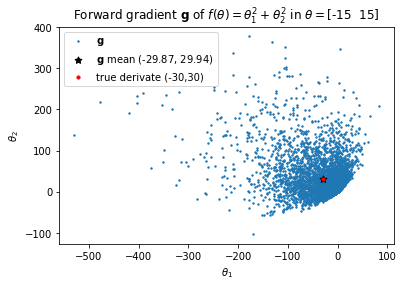

In [ ]:
# Set a seed to keep it reproducible
np.random.seed(0) 

# Geneate a million random vectors of size 2
v = np.random.randn(1_000_000, 2)

# Compute forward gradient g
g = fwd_grad(f, v, x0)

# Plot g, it's mean and true derivative
plt.scatter(g[:5000,0], g[:5000,1], s=2, label=r'$\mathbf{g}$')
plt.scatter(g.mean(axis=0)[0], g.mean(axis=0)[1], c='k', s=50, marker=(5, 1), label=r"$\mathbf{g}$ mean "+f'({g.mean(axis=0)[0]:.2f}, {g.mean(axis=0)[1]:.2f})')
plt.scatter(2*x0[0][0], 2*x0[0][1], c='r', s=10, label="true derivate "+f'({2*x0[0][0]},{2*x0[0][1]})')

# Add labels and legend
plt.title(r'Forward gradient $\mathbf{g}$ of $f(x)=x_1^2+x_2^2$ in $x=$'+f'{x0.sum(axis=0)}')
plt.xlabel(r'$x_1$')
plt.ylabel(r'$x_2$')
plt.legend(loc='upper left')
plt.show()

This time, although not the canonical basis $\mathbf{v}=\begin{bmatrix} 1 & 0\\ 0 & 1 \end{bmatrix}$ but random vectors were used, the result is the same. That's because, as $\mathbf{g}_\mathbf{v}(x)$ is an unbiased estimator of the gradient $\nabla f(x)$, by sampling many $\mathbf{v}$'s and computing (and average) the corresponding forward gradients, we end up with a pretty good approximation of the true gradient. 

---

Let us now try to perform a gradient descent using the forward gradient.

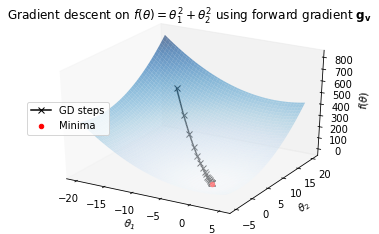

In [ ]:
# Define the initial values of x
x0 = np.array([-15, 15])

# Define the function
def f(x):
    return x[0]**2 + x[1]**2

# This alternative function will be used to compute gradients
def f_grad(x):
    return x[:,0]**2 + x[:,1]**2

# Define the parameters for the plot
t1 = np.linspace(-20, 5, 100)
t2 = np.linspace(-5, 20, 100)
T1, T2 = np.meshgrid(t1, t2)

# Set the learning rate
alpha = 0.1

# Initialize list of gradients
fwd_grads = list()

# Perform gradient descent and save points in x_list
x_list = [x0.copy()]
for i in range(iters):
    grad = fwd_grad(f_grad, np.random.randn(1_000_000, 2), np.array([x0])).mean(axis=0)
    fwd_grads.append(grad)
    x0 = x0 - alpha * grad  
    x_list.append(x0.copy())
x_list = np.array(x_list)
fwd_grads = np.array(fwd_grads)

# Create a plot, disable grid, and add a title
ax = plt.axes(projection='3d')
ax.grid(False)
plt.title(r"Gradient descent on $f(x)=x_1^2+x_2^2$ using forward gradient $\mathbf{g}_\mathbf{v}$")

# Plot f, GD steps and minima
ax.plot_surface(T1, T2, f([T1, T2]), cmap='Blues', alpha=0.6)
ax.plot(x_list[:, 0], x_list[:, 1], f([*x_list.T]), '-x', color='black', label="GD steps", alpha=1)
ax.scatter(0, 0, 0, color='r', label='Minima')

# Add labels and legend
ax.set_xlabel(r'$x_1$')
ax.set_ylabel(r'$x_2$')
ax.set_zlabel(r'$f(x)$')
plt.legend(loc='center left')
plt.show()

As we can see we get pretty good results, compared to the one obtained using the mathematical formulation to compute the gradient.

Let us now actually analyze how far the forward gradient approximation deviates from the true value:

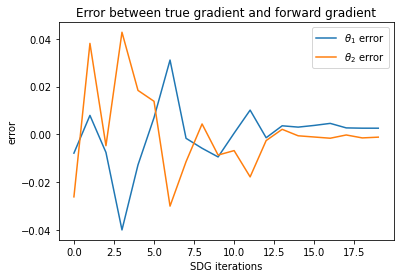

In [ ]:
plt.plot(grads[:,0]-fwd_grads[:,0], label=r'$x_1$ error')
plt.plot(grads[:,1]-fwd_grads[:,1], label=r'$x_2$ error')

plt.title(r"Error between true gradient and forward gradient")
plt.xlabel(r'SDG iterations')
plt.ylabel('error')
plt.legend()
plt.show()

---

In [ ]:
import torch
import torch.autograd.forward_ad as fwAD

class Fn(torch.autograd.Function):
    @staticmethod
    def forward(ctx, foo):
        result = torch.exp(foo)
        # Tensors stored in ctx can be used in the subsequent forward grad
        # computation.
        ctx.result = result
        return result

    @staticmethod
    def jvp(ctx, gI):
        gO = gI * ctx.result
        # If the tensor stored in ctx will not also be used in the backward pass,
        # one can manually free it using ``del``
        del ctx.result
        return gO

fn = Fn.apply

primal = torch.randn(10, 10, dtype=torch.double, requires_grad=True)
tangent = torch.randn(10, 10)

with fwAD.dual_level():
    dual_input = fwAD.make_dual(primal, tangent)
    dual_output = fn(dual_input)
    jvp = fwAD.unpack_dual(dual_output).tangent

# It is important to use ``autograd.gradcheck`` to verify that your
# custom autograd Function computes the gradients correctly. By default,
# gradcheck only checks the backward-mode (reverse-mode) AD gradients. Specify
# ``check_forward_ad=True`` to also check forward grads. If you did not
# implement the backward formula for your function, you can also tell gradcheck
# to skip the tests that require backward-mode AD by specifying
# ``check_backward_ad=False``, ``check_undefined_grad=False``, and
# ``check_batched_grad=False``.
torch.autograd.gradcheck(Fn.apply, (primal,), check_forward_ad=True,
                         check_backward_ad=False, check_undefined_grad=False,
                         check_batched_grad=False)

print(fn(torch.tensor(1)))

tensor(2.7183)


In [ ]:
from sklearn import datasets
from sklearn.model_selection import train_test_split

# Load the iris dataset and convert the numpy arrays to PyTorch tensors
iris = datasets.load_iris()
X = torch.from_numpy(iris.data).float()
y = torch.from_numpy(iris.target).long()

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create TensorDatasets for training and test sets
train_dataset = torch.utils.data.TensorDataset(X_train, y_train)
test_dataset = torch.utils.data.TensorDataset(X_test, y_test)

# Define batch_size
batch_size = 32

# Create DataLoaders for training and test sets
train_dataloader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True, num_workers=2)
test_dataloader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size, shuffle=False, num_workers=2)

### References

[1] [Derivative](https://en.wikipedia.org/wiki/Derivative).

[2] Kofi Asiedu Brempong, 2020 [I Finally Understood Backpropagation: And you can too...](https://towardsdatascience.com/i-finally-understood-backpropagation-and-you-can-too-44f7dd98ff52).

[3] Atılım Gunes Baydin, Barak A. Pearlmutter, Don Syme, Frank Wood, Philip Torr, 2022. [Gradients without Backpropagation](https://arxiv.org/abs/2005.00817).

[4] [Dual number](https://en.wikipedia.org/wiki/Dual_number).

[5] Mark Saroufim, 2019. [Automatic Differentiation Step by Step](https://marksaroufim.medium.com/automatic-differentiation-step-by-step-24240f97a6e6).

[6] Robert Lange, 2019. [Forward Mode Automatic Differentiation & Dual Numbers](https://towardsdatascience.com/forward-mode-automatic-differentiation-dual-numbers-8f47351064bf).

[7] [Automatic Differentiation in Machine Learning: a Survey](https://www.jmlr.org/papers/volume18/17-468/17-468.pdf).

[8] Daniel Worrall, 2021. [Dual numbers](https://danielewworrall.github.io/blog/2021/08/dual-numbers/)